In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps
from statsmodels.sandbox.stats.multicomp import multipletests
import matplotlib.pyplot as plt

%matplotlib inline

200 семплов


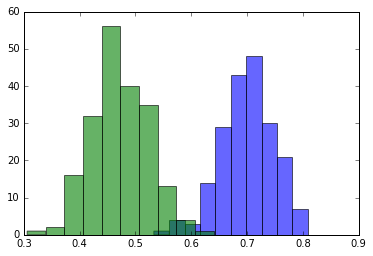

In [2]:
data = pd.read_csv("hw6t4v2.txt", sep=" ", header=None)
X, Y = data[0].values, data[1].values
print X.shape[0], "семплов"
plt.hist(X, alpha=0.6)
plt.hist(Y, alpha=0.6);

Обе выборки имеет визуальные отклонения от нормального распределения. Также, очевидно, что выборки имеют различные распределения.

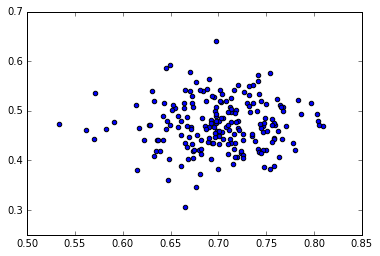

In [3]:
plt.scatter(X, Y);

По графику сказал бы, что выборки независимы.

Для проверки независимости выборок используем критерий хи-квадрат:

In [4]:
p_values = []
observed = np.histogram2d(X, Y, bins=2)[0]
assert observed.sum(axis=0).min() * observed.sum(axis=1).min() / X.shape[0] >= 5
p_value = sps.chi2_contingency(observed)[1]
p_values.append(p_value)

Для проверки нормальности выборок используем КС-тест:

In [6]:
p_values.append(sps.kstest(X, "norm")[1])
p_values.append(sps.kstest(Y, "norm")[1])

Для проверки однородности используем критерий Смирнова (выборки имеют непрер. ф.р.) и критерий ранговых сумм Уилкоксона (Манна-Уитни), т.к. предполагаем, что выборки независимы.

In [9]:
p_values.append(sps.ks_2samp(X, Y)[1])
p_values.append(sps.mannwhitneyu(X, Y)[1])

Для поправки на множественную проверку гипотез воспользуемся методом Бенджамини-Иекутиели, т.к. он контролирует FDR и является мощнейшей процедурой при отсутствии информации о зависимости между статистиками (в нашем случае статистики считаются по одним и тем же выборкам, поэтому они могут быть зависимы).

In [11]:
results = multipletests(p_values, alpha=0.1, method='fdr_by')
print results[0]
print results[1]

[False  True  True  True  True]
[  1.00000000e+00   0.00000000e+00   0.00000000e+00   7.29793464e-83
   1.68700031e-66]


Как видим, гипотезы о нормальности и однородности были отклонены на уровне значимости 0.1 (с большим запасом), в то же время гипотеза о независимости выборок не была отклонена, как и предполагалось из графиков.